In [124]:
import os
import matplotlib.pyplot as plt  # to visualize data and draw plots
import numpy as np  # to use numpy arrays
import tensorflow as tf  # to specify and run computation graphs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
import visualkeras


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [125]:
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

In [126]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [127]:
# Performing Validation Split
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(45000, 32, 32, 3) (45000, 1) (5000, 32, 32, 3) (5000, 1)


In [128]:
# Normalize the pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0

# One-hot encode the labels
num_classes = 100
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_val = to_categorical(Y_val, num_classes)

# Flatten the labels to a 1D array
Y_train = np.argmax(Y_train, axis=1)
Y_test = np.argmax(Y_test, axis=1)
Y_val = np.argmax(Y_val, axis=1)

print(Y_train.shape)  # (50000,)
print(Y_test.shape)  # (10000,)
print(Y_val.shape)

(45000,)
(10000,)
(5000,)


# Model 

In [129]:
# # # With Batch Normalization and Dropout Layers and L2 normalization(either dropout or L1 or L2)

model = Sequential()

model.add(Conv2D(input_shape=(32, 32, 3),kernel_size=(2, 2),padding="same",strides=(2, 2),filters=32,kernel_regularizer=l2(0.001)))#,kernel_regularizer=l2(0.001)
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
# model.add(Dropout(0.1))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))


model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
# model.add(Dropout(0.1))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Conv2D(kernel_size=(2, 2), padding="same", strides=(2, 2), filters=1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(100, activation="softmax"))

In [130]:
# Define early stopping criteria
early_stop = EarlyStopping(monitor="val_loss", patience=5)

In [131]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 16, 16, 32)        416       
_________________________________________________________________
batch_normalization_89 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_89 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
batch_normalization_90 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
activation_90 (Activation)   (None, 8, 8, 64)        

In [132]:
opt = "Adam"
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [133]:
history = model.fit(
    X_train, Y_train, epochs=50, validation_data=(X_val, Y_val)
)  # , callbacks=[early_stop]

Epoch 1/50
1407/1407 [==============================] - 7s 4ms/step - loss: 3.7135 - accuracy: 0.1290 - val_loss: 3.4659 - val_accuracy: 0.1762
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.0595 - accuracy: 0.2358 - val_loss: 2.9227 - val_accuracy: 0.2584
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.7366 - accuracy: 0.2948 - val_loss: 2.7461 - val_accuracy: 0.2958
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.4965 - accuracy: 0.3478 - val_loss: 2.6844 - val_accuracy: 0.3110
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3148 - accuracy: 0.3865 - val_loss: 2.8690 - val_accuracy: 0.2958
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.1527 - accuracy: 0.4239 - val_loss: 2.6591 - val_accuracy: 0.3398
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.0017 - accuracy: 0.4547 - val_loss: 2.5136 - val_accuracy:

# Test Data

In [134]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("test accuracy", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 4.3608 - accuracy: 0.3946
test accuracy 0.3946000039577484


# Confusion Matrix

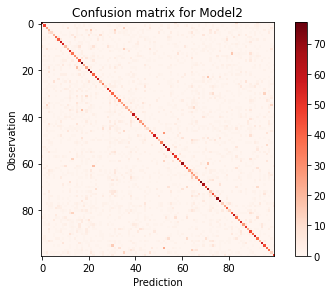

In [136]:
def plot_confusion_matrix(
    cm, classes, normalize=True, title="Confusion matrix for Model2", cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        plt.tight_layout()
        plt.ylabel("Observation")
        plt.xlabel("Prediction")
    plt.savefig('confusion_matrix.png', format='png',dpi=500) 


Y_pred = model.predict(X_test)
# Convert predictions classes to one hot encoders
Y_pred_classes = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(100))

# PLot Validation and Traning

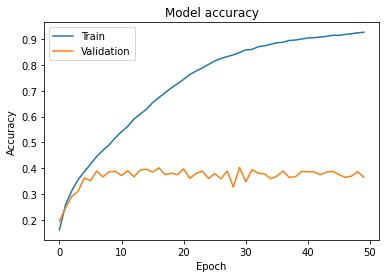

In [60]:
import matplotlib.pyplot as plt

# plot training and validation accuracy vs epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# save plot as png file
plt.savefig("accuracy_plot.png", dpi=500)

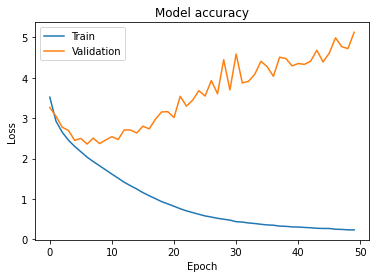

In [61]:
import matplotlib.pyplot as plt

# plot training and validation Loss vs epochs
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# save plot as png file
plt.savefig("loss_plot.png", dpi=500)

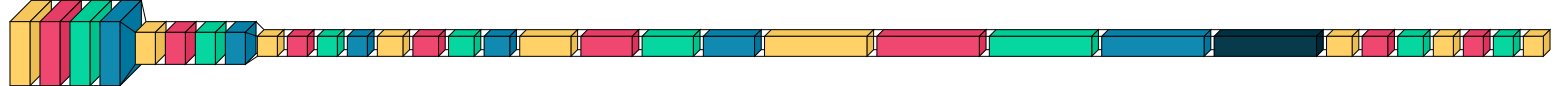

AttributeError: 'NoneType' object has no attribute 'layers'

In [62]:
# Visualize the Model

model = visualkeras.layered_view(model).show()
visualkeras.layered_view(model, legend="True", to_file='output.png') 
visualkeras.layered_view(model, to_file='output.png').show()